In [47]:
import pandas as pd
import numpy as np

%store -r NSLFlows
%store -r BNDFlows
%store -r NEMFlows
%store -r ELCFlows
%store -r IF1Flows
%store -r IF2Flows
%store -r MEWFlows

In [48]:
ImportData = pd.DataFrame({"North Sea Link": NSLFlows.iloc[:,1]})
ImportData["BritNed"] = BNDFlows.iloc[:,1]
ImportData["Nemo Link"] = NEMFlows.iloc[:,1]
ImportData["ElecLink"] = ELCFlows.iloc[:,1]
ImportData["IFA"] = IF1Flows.iloc[:,1]
ImportData["IFA 2"] = IF2Flows.iloc[:,1]
ImportData["Moyle and East-West"] = MEWFlows.iloc[:,1]

ImportData["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "North Sea Link", "BritNed", "Nemo Link", "ElecLink", "IFA", "IFA 2", "Moyle and East-West"]

ImportData = ImportData.reindex(columns=NewOrder)

In [49]:
ImportData = ImportData.replace(np.NaN, 0)

ImportData["Total Imports"] = (ImportData["North Sea Link"] + ImportData["BritNed"]
                                     + ImportData["Nemo Link"] + ImportData["ElecLink"]
                                     + ImportData["IFA"] + ImportData["IFA 2"]
                                     + ImportData["Moyle and East-West"])
print(ImportData.to_string())

          Date  North Sea Link   BritNed  Nemo Link  ElecLink      IFA    IFA 2  Moyle and East-West  Total Imports
0   2021-01-01             0.0      6.00   24029.25       0.0      0.0      0.0               9007.0       33042.25
1   2021-01-02             0.0      0.00   23605.25       0.0      0.0      0.0                765.0       24370.25
2   2021-01-03             0.0      0.00   23762.25       0.0      0.0      0.0               1095.0       24857.25
3   2021-01-04             0.0     17.00   21801.50       0.0      0.0      0.0                726.0       22544.50
4   2021-01-05             0.0     11.00   14150.00       0.0      0.0      0.0                140.0       14301.00
5   2021-01-06             0.0     14.00   19651.50       0.0      0.0      0.0                422.0       20087.50
6   2021-01-07             0.0     15.00   22638.00       0.0      0.0      0.0               2739.0       25392.00
7   2021-01-08             0.0     16.00   19521.00       0.0      0.0  

In [50]:
print("Max Import [MWh]:", max(ImportData["Total Imports"]))

a = sum(ImportData["Total Imports"])
a

Max Import [MWh]: 134366.75


41731511.25

In [51]:
ELC1 = pd.DataFrame({"Index": range(1,366)})
ELC1["GB - FR"] = np.NaN

ELC2 = pd.DataFrame({"Index": range(365, 731)})
ELC2["GB - FR"] = ELCFlows.iloc[:,2]

print(ELC1)
print(ELC2)

ExportData = pd.DataFrame({"North Sea Link": NSLFlows.iloc[:,2]})
ExportData["BritNed"] = BNDFlows.iloc[:,2]
ExportData["Nemo Link"] = NEMFlows.iloc[:,2]
ExportData["ElecLink"] = pd.concat([ELC1["GB - FR"], ELC2["GB - FR"]], ignore_index=True)
ExportData["IFA"] = IF1Flows.iloc[:,2]
ExportData["IFA 2"] = IF2Flows.iloc[:,2]
ExportData["Moyle and East-West"] = MEWFlows.iloc[:,2]

ExportData["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "North Sea Link", "BritNed", "Nemo Link", "ElecLink", "IFA", "IFA 2", "Moyle and East-West"]

ExportData = ExportData.reindex(columns=NewOrder)
print(ExportData.to_string())

     Index  GB - FR
0        1      NaN
1        2      NaN
2        3      NaN
3        4      NaN
4        5      NaN
..     ...      ...
360    361      NaN
361    362      NaN
362    363      NaN
363    364      NaN
364    365      NaN

[365 rows x 2 columns]
     Index  GB - FR
0      365      NaN
1      366      NaN
2      367      NaN
3      368      NaN
4      369      NaN
..     ...      ...
361    726      0.0
362    727      0.0
363    728    715.0
364    729      0.0
365    730      NaN

[366 rows x 2 columns]
          Date  North Sea Link   BritNed  Nemo Link  ElecLink      IFA    IFA 2  Moyle and East-West
0   2021-01-01             NaN      0.00       0.00       NaN      NaN      NaN                 63.0
1   2021-01-02             NaN      4.00       0.00       NaN      NaN      NaN               1263.0
2   2021-01-03             NaN      3.00       0.00       NaN      NaN      NaN               2940.0
3   2021-01-04             NaN      0.00       0.00       NaN      N

In [52]:
ExportData = ExportData.replace(np.NaN, 0)

ExportData["Total Exports"] = (ExportData["North Sea Link"] + ExportData["BritNed"]
                                     + ExportData["Nemo Link"] + ExportData["ElecLink"]
                                     + ExportData["IFA"] + ExportData["IFA 2"]
                                     + ExportData["Moyle and East-West"])

%store ExportData

print(ExportData.to_string())

Stored 'ExportData' (DataFrame)
          Date  North Sea Link   BritNed  Nemo Link  ElecLink      IFA    IFA 2  Moyle and East-West  Total Exports
0   2021-01-01             0.0      0.00       0.00       0.0      0.0      0.0                 63.0          63.00
1   2021-01-02             0.0      4.00       0.00       0.0      0.0      0.0               1263.0        1267.00
2   2021-01-03             0.0      3.00       0.00       0.0      0.0      0.0               2940.0        2943.00
3   2021-01-04             0.0      0.00       0.00       0.0      0.0      0.0               6429.0        6429.00
4   2021-01-05             0.0      2.00       0.00       0.0      0.0      0.0               9081.0        9083.00
5   2021-01-06             0.0      0.00       0.00       0.0      0.0      0.0               2804.0        2804.00
6   2021-01-07             0.0      0.00       0.00       0.0      0.0      0.0               2152.0        2152.00
7   2021-01-08             0.0      1.00

In [53]:
b = sum(ExportData["Total Exports"])
b

22297748.5

(18591.55, 19393.45)


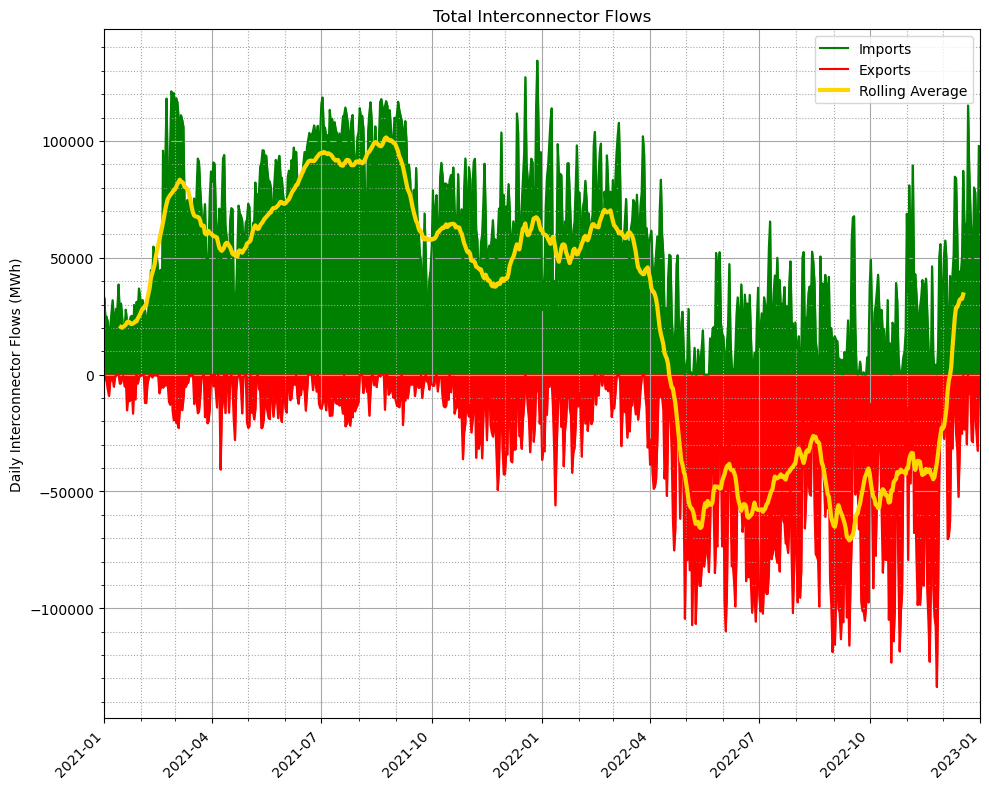

In [54]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Total Interconnector Flows')
plt.ylabel('Daily Interconnector Flows (MWh)')

Mean = (ImportData["Total Imports"] - ExportData["Total Exports"])/math.sqrt(2)
Sum = ImportData["Total Imports"] - ExportData["Total Exports"]

ax.plot(ImportData["Date"], ImportData["Total Imports"], color="green", label="Imports")
ax.plot(ExportData["Date"], -ExportData["Total Exports"], color="red", label="Exports")
ax.plot(ImportData["Date"], Sum.rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
#ax.plot(ImportData["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.tight_layout()

plt.fill_between(ImportData["Date"], ImportData["Total Imports"], color="green")
plt.fill_between(ExportData["Date"], -ExportData["Total Exports"], color="red")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()